In [87]:
# import python libraries
import graphedit
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import shapely
from shapely.geometry import Point, LineString
from shapely.wkt import loads, dumps
import momepy
import networkx as nx
import json
import matplotlib.pyplot as plt

In [46]:
conc_edges = gpd.read_file("../data/processed/workflow_steps/edges_concept.gpkg")
beta_edges = gpd.read_file("../data/processed/workflow_steps/edges_beta.gpkg")

In [95]:
gdf = gpd.read_file("../data/processed/workflow_steps/edges_concept.gpkg")
n = shapely.node(gdf.unary_union)
n = gpd.GeoDataFrame({"geometry": [n]}, crs = gdf.crs)
n = n.explode(index_parts=False).reset_index(drop=True)
conc_edges = n.copy()
del(gdf,n)

110 110


In [96]:
gdf = gpd.read_file("../data/processed/workflow_steps/edges_beta.gpkg")
n = shapely.node(gdf.unary_union)
n = gpd.GeoDataFrame({"geometry": [n]}, crs = gdf.crs)
n = n.explode(index_parts=False).reset_index(drop=True)
beta_edges = n.copy()
del(gdf,n)


228 228


In [139]:
beta_edges_overlap = beta_edges[beta_edges.overlaps(conc_edges.unary_union)].copy()

In [140]:
conc_edges_buffered = conc_edges.copy()
conc_edges_buffered["geometry"] = conc_edges_buffered.buffer(25)

In [146]:
beta_edges_in_concept_buffer = beta_edges[beta_edges.intersection(conc_edges_buffered.unary_union).length>0]

### OMG! finally found it (see intersection/length combi below).
next:
- find edges *only* in beta_edges
- find edges *only* in concept_edges
- check plots
- once ok: save as 3 separate data sets

<Axes: >

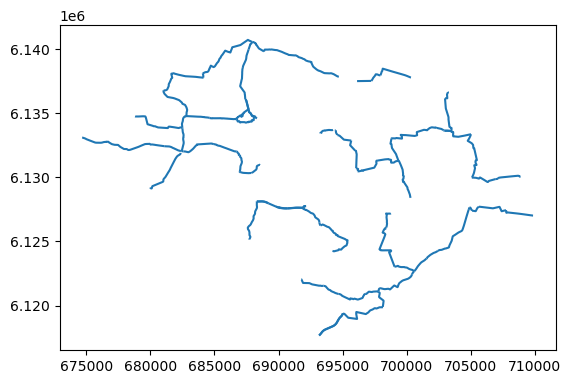

In [165]:
beta_edges[beta_edges.intersection(conc_edges_buffered.unary_union).length / beta_edges.length > 0.5].plot()

In [154]:
all(beta_edges.loc[beta_edges_in_concept_buffer.index].length / beta_edges_in_concept_buffer.length > 0.5)

True

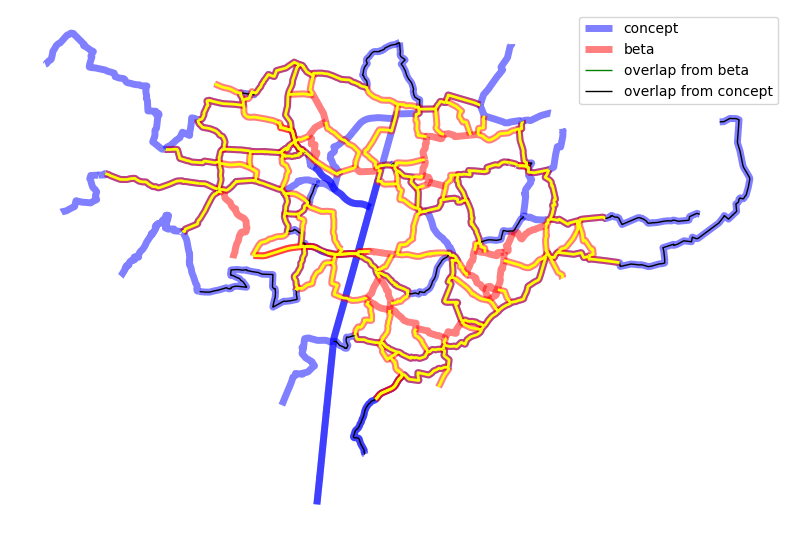

In [156]:
fig, ax = plt.subplots(1,1, figsize =(10,10))
conc_edges.plot(ax=ax, color = "blue", linewidth = 5, alpha = 0.5, label = "concept")
beta_edges.plot(ax=ax, color = "red", linewidth = 5, alpha = 0.5, label = "beta")

beta_edges_overlap = beta_edges[beta_edges.overlaps(conc_edges.unary_union)].copy()
beta_edges_overlap.plot(ax=ax, color = "green", label = "overlap from beta", linewidth = 1)

conc_edges_overlap = conc_edges[conc_edges.overlaps(beta_edges.unary_union)]
conc_edges_overlap.plot(ax=ax, color = "black", label = "overlap from concept", linewidth = 1)

#idf.plot(ax=ax, color = "black", label = "intersection", linewidth = 2)
#beta_edges[list(np.divide(np.array(o_lengths), np.array(beta_lengths)) > 0)].plot(ax=ax, color = "white")
beta_edges_in_concept_buffer.plot(ax=ax, color = "yellow", linewidth = 2)
plt.legend()
ax.set_axis_off()
plt.show()

<Axes: >

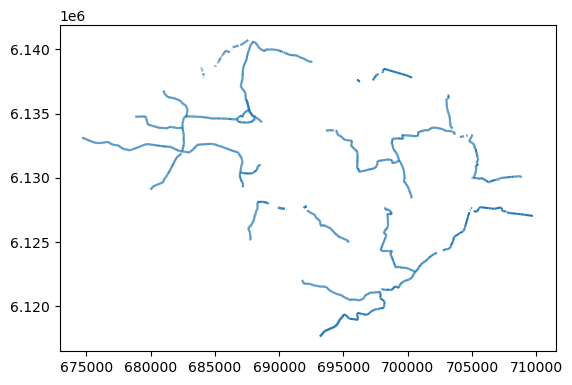

In [93]:
idf = gpd.GeoDataFrame(
    {"geometry": [c for c in conc_edges.unary_union.intersection(beta_edges.unary_union).geoms]
     },
    crs = conc_edges.crs)
idf = idf[idf.geometry.type == "LineString"].copy().reset_index(drop=True)
idf.plot()

In [101]:
# get LENGTH of overlap
o = beta_edges.intersection(conc_edges.unary_union)
beta_lengths = beta_edges.geometry.length

0      3905.986982
1       260.819707
2      1920.953074
3      3146.893005
4       985.951081
          ...     
223    1906.582574
224    1259.572808
225     339.559716
226       1.964612
227       2.110095
Length: 228, dtype: float64

In [115]:
o_lengths = [g.length for g in o]
o_lengths

[1106.327686104417,
 0.0,
 645.4060220054823,
 994.4524821275785,
 334.62224023259375,
 762.5449986427237,
 0.0,
 121.79800623400466,
 126.09222773988492,
 4.7986484933403935,
 0.0,
 0.0,
 487.093622377473,
 86.27108073045197,
 267.65799261131656,
 240.91305498590376,
 0.0,
 0.0,
 208.1828169115708,
 789.7062304674454,
 0.0,
 0.0,
 237.95571635217868,
 157.80503684623395,
 542.7973331139466,
 0.0,
 1017.1433744778726,
 443.170868387196,
 392.4960244477463,
 5.486966806552589,
 1438.3285199267268,
 0.0,
 13.024688177546375,
 872.6545931615651,
 0.0,
 208.79223369052244,
 1117.3788304592485,
 0.0,
 0.0,
 44.335422032291405,
 73.7544525350757,
 836.2780670800618,
 1.3785758708852462,
 0.0,
 139.3215396324406,
 0.0,
 0.0,
 2263.25979496033,
 0.0,
 344.51431247080546,
 30.183144167613094,
 1216.66268569346,
 65.64308004635035,
 126.91338270049089,
 0.0,
 627.4828110072449,
 0.0,
 35.323163569763324,
 315.54158256727334,
 0.0,
 259.64843143793416,
 0.0,
 911.137468445521,
 818.96844902153,
 

<Axes: >

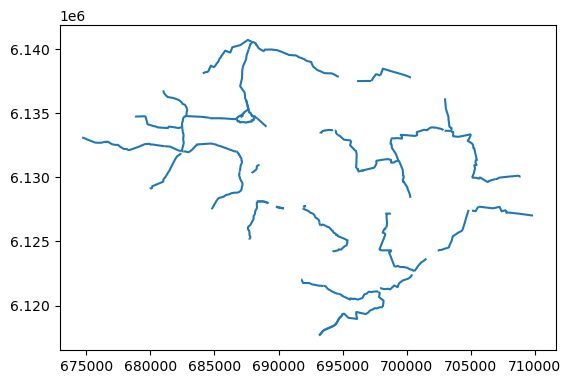

In [126]:
import numpy as np
beta_edges[list(np.divide(np.array(o_lengths), np.array(beta_lengths)) > 0.1)].plot()

In [78]:
type(conc_edges["geometry"][0])

shapely.geometry.linestring.LineString

In [39]:
conc_edges["geometry"] = conc_edges.buffer(20)

<Axes: >

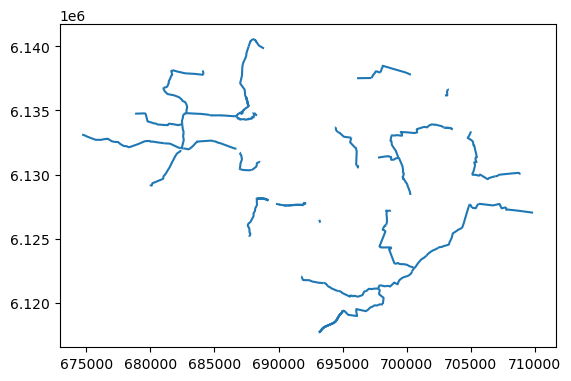

In [45]:
beta_edges.sjoin(conc_edges, how = "inner", predicate = "within").plot()

<Axes: >

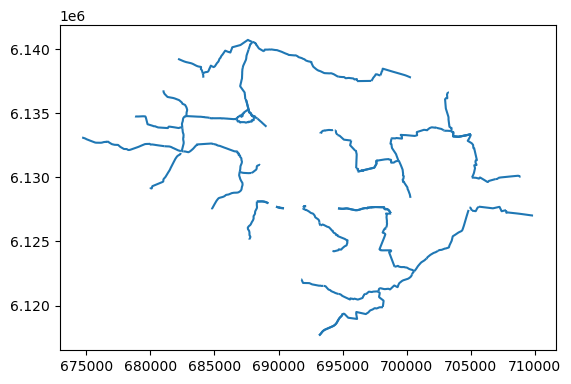

In [33]:
beta_edges.sjoin(conc_edges, how = "inner", predicate = "overlaps").plot()